# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  We'll start by exploring 

## Objectives

You will be able to:

* Understand and explain what a multi-level hierarchical index is
* Understand, explain the difference and use df.pivot and pd.pivot_table
* Switch between “long” and “wide” in a DataFrame using stack() and unstack()
* Transform “wide” to “long” DataFrames using `melt`

## Getting Started

### Import Pandas and Matplotlib.pyplot Using Standard Aliases

In the cell below:

* Import `pandas` and set the standard alias
* Import `matplotlib.pyplot` and set the standard alias
* Run the ipython magic command to display matplotlib graphs inline within the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` method.

In [2]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [8]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


In [9]:
df.describe()

,Notes,State Code,Deaths
count,0.0,4115.000000,4115.000000
mean,NaN,28.653706,10914.449575
std,NaN,15.608135,39418.879794
min,NaN,1.000000,10.000000
25%,NaN,16.000000,78.000000
50%,NaN,29.000000,437.000000
75%,NaN,41.000000,3658.500000
max,NaN,56.000000,720306.000000


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby Aggregations

Complete the following groupby statements.

### 1) Groupby State and Gender. Sum the values.

In [30]:
df.groupby(['State', 'Gender']).sum().head()

Notes  State Code  Deaths
State   Gender                           
Alabama Female    0.0          40  430133
        Male      0.0          40  430634
Alaska  Female    0.0          80   27199
        Male      0.0          84   36135
Arizona Female    0.0         176  395929

### 2) Groupby State and Gender and Race. Find the average values.

In [31]:
df.groupby(['State', 'Gender', 'Race']).mean().head()

Notes  State Code  \
State   Gender Race                                                  
Alabama Female American Indian or Alaska Native    NaN         1.0   
               Asian or Pacific Islander           NaN         1.0   
               Black or African American           NaN         1.0   
               White                               NaN         1.0   
        Male   American Indian or Alaska Native    NaN         1.0   

                                                       Deaths  
State   Gender Race                                            
Alabama Female American Indian or Alaska Native     70.875000  
               Asian or Pacific Islander            95.500000  
               Black or African American          9074.000000  
               White                             29890.636364  
        Male   American Indian or Alaska Native     86.375000

### 3) Groupby Gender and Race. Find the minimum values.

In [12]:
df.groupby(['Gender', 'Race']).min().head()

Notes    State  State Code  \
Gender Race                                                           
Female American Indian or Alaska Native    NaN  Alabama           1   
       Asian or Pacific Islander           NaN  Alabama           1   
       Black or African American           NaN  Alabama           1   
       White                               NaN  Alabama           1   
Male   American Indian or Alaska Native    NaN  Alabama           1   

                                        Ten-Year Age Groups  \
Gender Race                                                   
Female American Indian or Alaska Native           1-4 years   
       Asian or Pacific Islander                  1-4 years   
       Black or African American                  1-4 years   
       White                                      1-4 years   
Male   American Indian or Alaska Native           1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0

### 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

Text(0, 0.5, 'Number of Deaths')

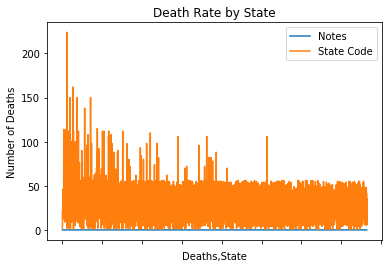

In [32]:
graph1 = df.groupby(['Deaths', 'State']).sum().plot()
graph1.set_title('Death Rate by State')
graph1.set_ylabel('Number of Deaths')

### Inspecting our Data

Let's go one step further and get a print-out of the data type of each column. 

In the cell below, get the `.info()` of our DataFrame, and note the data type that each column is currently stored as.  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Let's look at some samples from the Population column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [33]:
df.groupby(['State', 'Population']).sum().head()

Notes  State Code  Deaths
State   Population                           
Alabama 10042         0.0           1     246
        1129          0.0           1      40
        1170060       0.0           1   13132
        1263438       0.0           1   88930
        1269          0.0           1      92

Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [16]:
df.Population.value_counts(5)

Not Applicable    0.018226
2108              0.000486
6420              0.000486
249               0.000486
5142              0.000486
14810             0.000486
3654              0.000486
4412              0.000486
87405             0.000486
2816              0.000486
2777              0.000486
9192              0.000486
860               0.000486
907               0.000486
96274             0.000486
113598            0.000486
2146              0.000486
3240              0.000486
16653             0.000486
12217             0.000486
30070             0.000486
8198              0.000486
2115              0.000486
11680             0.000486
4258              0.000486
36460             0.000486
42847             0.000486
3556              0.000486
148               0.000486
367               0.000486
                    ...   
83618             0.000243
34555             0.000243
645684            0.000243
3147              0.000243
37233             0.000243
57422             0.000243
3

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### 5 a) Reformat the Population Column as an Integer
As stands, not all values will be able to be reformated as integers. Most of the cells in the the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `"Not Applicable"`.

We need to remove these rows before we can cast the Population column to an Integer data type. 

In the cell below:

* Slice the rows of `df` where the Population column is equal to `'Not Applicable'`.
* Use `to_drop.index`  to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`
* Cast the Population column to an integer data type using the `.astype()` function, with the single parameter `int64` passed in. 
* Print the Population column's `dtype` attribute to confirm it is now stored in `int64` format. 

**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [3]:
df['Population']= df['Population'].replace('Not Applicable', np.nan)
df = df.dropna(axis=0, subset=['Population'])
df['Population'].astype(int)

0          3579
1          7443
2        169339
3        347921
4          7366
5        173241
6        364029
7         30421
8        670420
9       1389699
10       686063
11      1457208
12      1777031
13      3608616
14        72892
15      1827893
16      3809162
17        77467
18      1960325
19      3811460
20        49356
21        86058
22      1875654
23      3988037
24        40537
25        97652
26      1672441
27      3710682
28        43754
29        96274
         ...   
4085       3730
4086     551003
4087       9937
4088       3021
4089       5066
4090     578769
4091       4922
4092       2627
4093       2324
4094     341149
4095       4638
4096       1321
4097       2513
4098     332999
4099       2270
4100       1260
4101       1737
4102     210365
4103       1716
4104        837
4105       1392
4106     169410
4107        637
4108        336
4109        758
4110      95575
4111        356
4112        244
4113        454
4114      49954
Name: Population, Length

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4040 non-null object
State Code                  4040 non-null int64
Ten-Year Age Groups         4040 non-null object
Ten-Year Age Groups Code    4040 non-null object
Gender                      4040 non-null object
Gender Code                 4040 non-null object
Race                        4040 non-null object
Race Code                   4040 non-null object
Deaths                      4040 non-null int64
Population                  4040 non-null object
Crude Rate                  4040 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 410.3+ KB


### 5 b) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

In [4]:
State_mean = df.groupby(['State', 'Population']).mean() #I don't understand this question. How can you have
#a mean of a single state population?
State_mean

Notes  State Code   Deaths
State   Population                            
Alabama 10042         NaN         1.0    246.0
        1129          NaN         1.0     40.0
        1170060       NaN         1.0  13132.0
        1263438       NaN         1.0  88930.0
        1269          NaN         1.0     92.0
        1344952       NaN         1.0  13367.0
        1350006       NaN         1.0   6325.0
        1389699       NaN         1.0    385.0
        1415384       NaN         1.0   4266.0
        14251         NaN         1.0    119.0
        14498         NaN         1.0    166.0
        1457208       NaN         1.0    561.0
        1609494       NaN         1.0   9035.0
        1641941       NaN         1.0   4506.0
        1672441       NaN         1.0   2098.0
        16824         NaN         1.0    132.0
        169339        NaN         1.0   2093.0
        173241        NaN         1.0   2732.0
        1777031       NaN         1.0    357.0
        1827893       NaN         1.0    495.0
        1834047       NaN         1.0  92945.0
        187517        NaN         1.0  26911.0
        1875654       NaN         1.0   3333.0
        1960325       NaN         1.0   1203.0
        2087          NaN         1.0     94.0
        2173          NaN         1.0    145.0
        235423        NaN         1.0  18957.0
        2441673       NaN         1.0  72064.0
        24770         NaN         1.0    200.0
        2828467       NaN         1.0  53386.0
...                   ...         ...      ...
Wyoming 454           NaN        56.0     32.0
        4638          NaN        56.0    166.0
        4869          NaN        56.0     20.0
        4922          NaN        56.0    144.0
        49954         NaN        56.0   7982.0
        5066          NaN        56.0     47.0
        5171          NaN        56.0     26.0
        551003        NaN        56.0   3546.0
        5526          NaN        56.0     15.0
        573275        NaN        56.0    454.0
        57791         NaN        56.0    327.0
        578769        NaN        56.0   5545.0
        587772        NaN        56.0    954.0
        589569        NaN        56.0     92.0
        60874         NaN        56.0    415.0
        614527        NaN        56.0   1514.0
        619027        NaN        56.0   1131.0
        627355        NaN        56.0    150.0
        630970        NaN        56.0    317.0
        637           NaN        56.0     72.0
        6724          NaN        56.0     11.0
        672620        NaN        56.0   2160.0
        692318        NaN        56.0    961.0
        694760        NaN        56.0   3385.0
        758           NaN        56.0     37.0
        7741          NaN        56.0     29.0
        837           NaN        56.0     19.0
        8980          NaN        56.0     21.0
        95575         NaN        56.0  13140.0
        9937          NaN        56.0    165.0

[4039 rows x 3 columns]

In [7]:
State_mean.stack()
State_mean

Notes  State Code   Deaths
State   Population                            
Alabama 10042         NaN         1.0    246.0
        1129          NaN         1.0     40.0
        1170060       NaN         1.0  13132.0
        1263438       NaN         1.0  88930.0
        1269          NaN         1.0     92.0
        1344952       NaN         1.0  13367.0
        1350006       NaN         1.0   6325.0
        1389699       NaN         1.0    385.0
        1415384       NaN         1.0   4266.0
        14251         NaN         1.0    119.0
        14498         NaN         1.0    166.0
        1457208       NaN         1.0    561.0
        1609494       NaN         1.0   9035.0
        1641941       NaN         1.0   4506.0
        1672441       NaN         1.0   2098.0
        16824         NaN         1.0    132.0
        169339        NaN         1.0   2093.0
        173241        NaN         1.0   2732.0
        1777031       NaN         1.0    357.0
        1827893       NaN         1.0    495.0
        1834047       NaN         1.0  92945.0
        187517        NaN         1.0  26911.0
        1875654       NaN         1.0   3333.0
        1960325       NaN         1.0   1203.0
        2087          NaN         1.0     94.0
        2173          NaN         1.0    145.0
        235423        NaN         1.0  18957.0
        2441673       NaN         1.0  72064.0
        24770         NaN         1.0    200.0
        2828467       NaN         1.0  53386.0
...                   ...         ...      ...
Wyoming 454           NaN        56.0     32.0
        4638          NaN        56.0    166.0
        4869          NaN        56.0     20.0
        4922          NaN        56.0    144.0
        49954         NaN        56.0   7982.0
        5066          NaN        56.0     47.0
        5171          NaN        56.0     26.0
        551003        NaN        56.0   3546.0
        5526          NaN        56.0     15.0
        573275        NaN        56.0    454.0
        57791         NaN        56.0    327.0
        578769        NaN        56.0   5545.0
        587772        NaN        56.0    954.0
        589569        NaN        56.0     92.0
        60874         NaN        56.0    415.0
        614527        NaN        56.0   1514.0
        619027        NaN        56.0   1131.0
        627355        NaN        56.0    150.0
        630970        NaN        56.0    317.0
        637           NaN        56.0     72.0
        6724          NaN        56.0     11.0
        672620        NaN        56.0   2160.0
        692318        NaN        56.0    961.0
        694760        NaN        56.0   3385.0
        758           NaN        56.0     37.0
        7741          NaN        56.0     29.0
        837           NaN        56.0     19.0
        8980          NaN        56.0     21.0
        95575         NaN        56.0  13140.0
        9937          NaN        56.0    165.0

[4039 rows x 3 columns]

Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

## Using Aggregate Functions

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the head of this of this new DataFrame.

In [24]:
grouped = df.groupby(['State', 'Gender'])['Deaths', 'Population'].describe().head()
grouped

Deaths                                                   \
                count          mean           std   min     25%    50%   
State   Gender                                                           
Alabama Female   40.0  10753.325000  24612.250487  10.0   93.25  371.0   
        Male     40.0  10765.850000  20813.538537  10.0  105.50  528.0   
Alaska  Female   40.0    679.975000   1154.870455  13.0   64.00  208.5   
        Male     42.0    860.357143   1411.777392  12.0   83.25  219.0   
Arizona Female   44.0   8998.386364  26245.941003  21.0  263.50  875.0   

                                    
                     75%       max  
State   Gender                      
Alabama Female   8183.75  116297.0  
        Male    12224.50   88930.0  
Alaska  Female    807.00    4727.0  
        Male      958.00    5185.0  
Arizona Female   2457.00  133923.0

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

In [21]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114],
           dtype='int64', length=4040)

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `reset_index()` function.  Then, display the head of the DataFrame.  

In [22]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
df.reset_index()
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Note how the way the index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

In [25]:
grouped.index

MultiIndex(levels=[['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['Female', 'Male']],
           labels=[[0, 0, 1, 1, 2], [0, 1, 0, 1, 0]],
           names=['State', 'Gender'])

However, look again at the displayed DataFrame--specifically, the columns.  Resetting the index has caused the DataFrame to use a mutlti-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [26]:
grouped.columns

MultiIndex(levels=[['Deaths'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]])

### Column Levels

Since we're working with miulti-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `get_level_values` method contained within the DataFrame's `columns` object to get the values for the outermost layer of the index. 

In [29]:
grouped.columns.get_level_values(level = 0)

Index(['Deaths', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Deaths', 'Deaths',
       'Deaths'],
      dtype='object')

Now, get the level values for the inner layer of the index. 

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it--but take some time to examine the code in the cell below and see if you can understand how it works! 

In [30]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Index(['Deaths_count', 'Deaths_mean', 'Deaths_std', 'Deaths_min', 'Deaths_25%',
       'Deaths_50%', 'Deaths_75%', 'Deaths_max'],
      dtype='object')

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the head of the `grouped` DataFrame. 

In [31]:
grouped.head()

Deaths_count   Deaths_mean    Deaths_std  Deaths_min  \
State   Gender                                                         
Alabama Female          40.0  10753.325000  24612.250487        10.0   
        Male            40.0  10765.850000  20813.538537        10.0   
Alaska  Female          40.0    679.975000   1154.870455        13.0   
        Male            42.0    860.357143   1411.777392        12.0   
Arizona Female          44.0   8998.386364  26245.941003        21.0   

                Deaths_25%  Deaths_50%  Deaths_75%  Deaths_max  
State   Gender                                                  
Alabama Female       93.25       371.0     8183.75    116297.0  
        Male        105.50       528.0    12224.50     88930.0  
Alaska  Female       64.00       208.5      807.00      4727.0  
        Male         83.25       219.0      958.00      5185.0  
Arizona Female      263.50       875.0     2457.00    133923.0

## Using Pivots

Now, we'll gain some practice using the DataFrame class's built-in `.pivot()` method.  

In the cell below, call the DataFrame's pivot method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the head of our new `pivot` DataFrame to see what it looks like. 

In [41]:
grouped.stack()

State    Gender              
Alabama  Female  Deaths_count        40.000000
                 Deaths_mean      10753.325000
                 Deaths_std       24612.250487
                 Deaths_min          10.000000
                 Deaths_25%          93.250000
                 Deaths_50%         371.000000
                 Deaths_75%        8183.750000
                 Deaths_max      116297.000000
         Male    Deaths_count        40.000000
                 Deaths_mean      10765.850000
                 Deaths_std       20813.538537
                 Deaths_min          10.000000
                 Deaths_25%         105.500000
                 Deaths_50%         528.000000
                 Deaths_75%       12224.500000
                 Deaths_max       88930.000000
Alaska   Female  Deaths_count        40.000000
                 Deaths_mean        679.975000
                 Deaths_std        1154.870455
                 Deaths_min          13.000000
                 Deaths_25%   

In [39]:
pivoted = grouped.pivot(index = 'Death', columns = '', values = 'Deaths_mean')
#pivoted = pd.DataFrame(data = pivoted, index = 'State', columns = ['Gender', 'Deaths'])
pivoted.head()

Deaths_max,4727.0,5185.0,88930.0,116297.0,133923.0
Deaths_count,,,,,
40.0,679.975,NaN,10765.85,10753.325,NaN
42.0,NaN,860.357143,NaN,NaN,NaN
44.0,NaN,NaN,NaN,NaN,8998.386364


In [29]:
# Now it's time to pivot!
pivot = pivoted.pivot(pivot, index = 'State', columns = 'Gender', values = 'Deaths')
pivot.head()

AttributeError: 'SeriesGroupBy' object has no attribute 'pivot'

Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the head of the object to see if we can detect any changes.

In [ ]:
# Again, notice the subtle difference of reseting the index:
pivot = None

### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

In [ ]:
# Now let's make a sweet bar chart!!


Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods--do not rebind `pivot` to be equal to this line of code. 

In [ ]:
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.


Now, that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [ ]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.


Note that the index has not changed.  That's because the code we wrote when we set the index to the 'State' column returns a copy of the DataFrame object with the index set to 'State'--by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

In [ ]:
#If we wanted to more permanently change the index we would set it first and then plot:
pivot = None

Again, let's check the head of the DataFrame to confirm that the index structure has changed.  

Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

In [ ]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.


## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

As we can see, the `stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [ ]:
pivot = None

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set pivot equal to `pivot.unstack()` again, and then display the `pivot` object to see how things have changed.

In [ ]:
pivot = None

After calling unstack a second time, we can see that `pivot` has a flattened structure, since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `groupby` to stack and slice data conditionally
* Use aggregate functions in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 